In [1]:
ls

datalab/


In [2]:
from google.colab import files
uploaded=files.upload()

Saving arrhythmia - arrhythmia.csv to arrhythmia - arrhythmia.csv


In [0]:
import pandas as pd
import numpy as np
import random as rnd
from sklearn.preprocessing import Imputer

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import scipy.stats as stats
import sklearn.linear_model as linear_model
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [0]:
df=pd.read_csv('arrhythmia - arrhythmia.csv')

In [6]:
df.shape

(452, 280)

In [7]:
df.columns.values

array(['Age', 'Sex', 'Height', 'Weight', 'QRS_duration', 'P_R_interval',
       'Q_T_interval', 'T_interval', 'P_interval', 'QRS', 'T', 'P',
       'QRST', 'J', 'Heart_rate', 'Q_wave_DI', 'R_wave_DI', 'S_wave_DI',
       'R_dash_wave_DI', 'S_dash_wave_DI', 'Intrinsic_df_DI', 'C1_DI',
       'C2_DI', 'C3_DI', 'C4_DI', 'C5_DI', 'C6_DI', 'Q_wave_DII',
       'R_wave_DII', 'S_wave_DII', 'R_dash_wave_DII', 'S_dash_wave_DII',
       'Intrinsic_df_DII', 'C1_DII', 'C2_DII', 'C3_DII', 'C4_DII',
       'C5_DII', 'C6_DII', 'Q_wave_DIII', 'R_wave_DIII', 'S_wave_DIII',
       'R_dash_wave_DIII', 'S_dash_wave_DIII', 'Intrinsic_df_DIII',
       'C1_DIII', 'C2_DIII', 'C3_DIII', 'C4_DIII', 'C5_DIII', 'C6_DIII',
       'Q_wave_AVR', 'R_wave_AVR', 'S_wave_AVR', 'R_dash_wave_AVR',
       'S_dash_wave_AVR', 'Intrinsic_df_AVR', 'C1_AVR', 'C2_AVR',
       'C3_AVR', 'C4_AVR', 'C5_AVR', 'C6_AVR', 'Q_wave_AVL', 'R_wave_AVL',
       'S_wave_AVL', 'R_dash_wave_AVL', 'S_dash_wave_AVL',
       'Intrinsic_df_AVL', '

In [8]:
df.describe()

,Age,Sex,Height,Weight,QRS_duration,P_R_interval,Q_T_interval,T_interval,P_interval,QRS,...,Q_Wave_V6,R_Wave_V6,S_Wave_V6,R_dash_Wave_V6,S_dash_Wave_V6,P_Wave_V6,T_Wave_V6,QRSA_V6,QRSTA_V6,Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to Class
dtypes: float64(121), int64(159)
memory usage: 988.8 KB


In [10]:
df.select_dtypes(include='object').columns.values

array([], dtype=object)

In [11]:
df.select_dtypes(include='int64').columns.values

array(['Age', 'Sex', 'Height', 'Weight', 'QRS_duration', 'P_R_interval',
       'Q_T_interval', 'T_interval', 'P_interval', 'QRS', 'Q_wave_DI',
       'R_wave_DI', 'S_wave_DI', 'R_dash_wave_DI', 'S_dash_wave_DI',
       'Intrinsic_df_DI', 'C1_DI', 'C2_DI', 'C3_DI', 'C4_DI', 'C5_DI',
       'C6_DI', 'Q_wave_DII', 'R_wave_DII', 'S_wave_DII',
       'R_dash_wave_DII', 'S_dash_wave_DII', 'Intrinsic_df_DII', 'C1_DII',
       'C2_DII', 'C3_DII', 'C4_DII', 'C5_DII', 'C6_DII', 'Q_wave_DIII',
       'R_wave_DIII', 'S_wave_DIII', 'R_dash_wave_DIII',
       'S_dash_wave_DIII', 'Intrinsic_df_DIII', 'C1_DIII', 'C2_DIII',
       'C3_DIII', 'C4_DIII', 'C5_DIII', 'C6_DIII', 'Q_wave_AVR',
       'R_wave_AVR', 'S_wave_AVR', 'R_dash_wave_AVR', 'S_dash_wave_AVR',
       'Intrinsic_df_AVR', 'C1_AVR', 'C2_AVR', 'C3_AVR', 'C4_AVR',
       'C5_AVR', 'C6_AVR', 'Q_wave_AVL', 'R_wave_AVL', 'S_wave_AVL',
       'R_dash_wave_AVL', 'S_dash_wave_AVL', 'Intrinsic_df_AVL', 'C1_AVL',
       'C2_AVL', 'C3_AVL', 'C4_AVL'

In [12]:
df.select_dtypes(include='float64').columns.values

array(['T', 'P', 'QRST', 'J', 'Heart_rate', 'JJ_Wave_DI', 'Q_Wave_DI',
       'R_Wave_DI', 'S_Wave_DI', 'R_dash_Wave_DI', 'P_Wave_DI',
       'T_Wave_DI', 'QRSA_DI', 'QRSTA_DI', 'JJ_Wave_DII', 'Q_Wave_DII',
       'R_Wave_DII', 'S_Wave_DII', 'R_dash_Wave_DII', 'S_dash_Wave_DII',
       'P_Wave_DII', 'T_Wave_DII', 'QRSA_DII', 'QRSTA_DII',
       'JJ_Wave_DIII', 'Q_Wave_DIII', 'R_Wave_DIII', 'S_Wave_DIII',
       'R_dash_Wave_DIII', 'S_dash_Wave_DIII', 'P_Wave_DIII',
       'T_Wave_DIII', 'QRSA_DIII', 'QRSTA_DIII', 'JJ_Wave_AVR',
       'Q_Wave_AVR', 'R_Wave_AVR', 'S_Wave_AVR', 'R_dash_Wave_AVR',
       'S_dash_Wave_AVR', 'P_Wave_AVR', 'T_Wave_AVR', 'QRSA_AVR',
       'QRSTA_AVR', 'JJ_Wave_AVL', 'Q_Wave_AVL', 'R_Wave_AVL',
       'S_Wave_AVL', 'R_dash_Wave_AVL', 'P_Wave_AVL', 'T_Wave_AVL',
       'QRSA_AVL', 'QRSTA_AVL', 'JJ_Wave_AVF', 'Q_Wave_AVF', 'R_Wave_AVF',
       'S_Wave_AVF', 'R_dash_Wave_AVF', 'S_dash_Wave_AVF', 'P_Wave_AVF',
       'T_Wave_AVF', 'QRSA_AVF', 'QRSTA_AVF', 'JJ_Wav

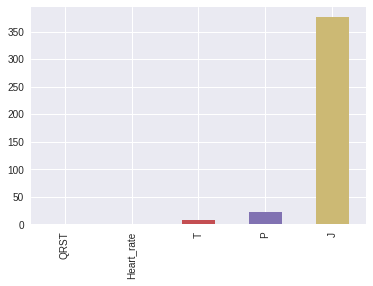

In [13]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [14]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
J,376,0.831858
P,22,0.048673
T,8,0.017699
Heart_rate,1,0.002212
QRST,1,0.002212
Class,0,0.000000
S_dash_wave_V1,0,0.000000
Intrinsic_df_V1,0,0.000000
C1_V1,0,0.000000
C2_V1,0,0.000000


In [0]:
#dealing with missing data
df = df.drop('J',axis=1)

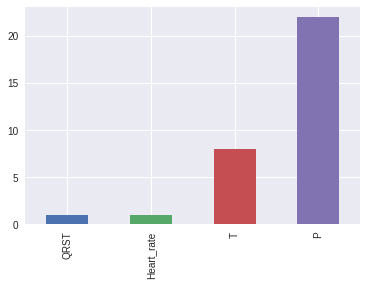

In [16]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [17]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
P,22,0.048673
T,8,0.017699
Heart_rate,1,0.002212
QRST,1,0.002212
Class,0,0.000000
S_wave_V1,0,0.000000
S_dash_wave_V1,0,0.000000
Intrinsic_df_V1,0,0.000000
C1_V1,0,0.000000
C2_V1,0,0.000000


In [18]:
df.head(2)

,Age,Sex,Height,Weight,QRS_duration,P_R_interval,Q_T_interval,T_interval,P_interval,QRS,...,Q_Wave_V6,R_Wave_V6,S_Wave_V6,R_dash_Wave_V6,S_dash_Wave_V6,P_Wave_V6,T_Wave_V6,QRSA_V6,QRSTA_V6,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6


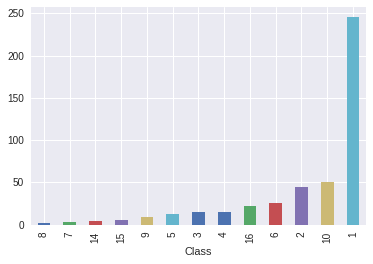

In [19]:
count=df.groupby('Class').size()
count.sort_values(inplace=True)
count.plot.bar()



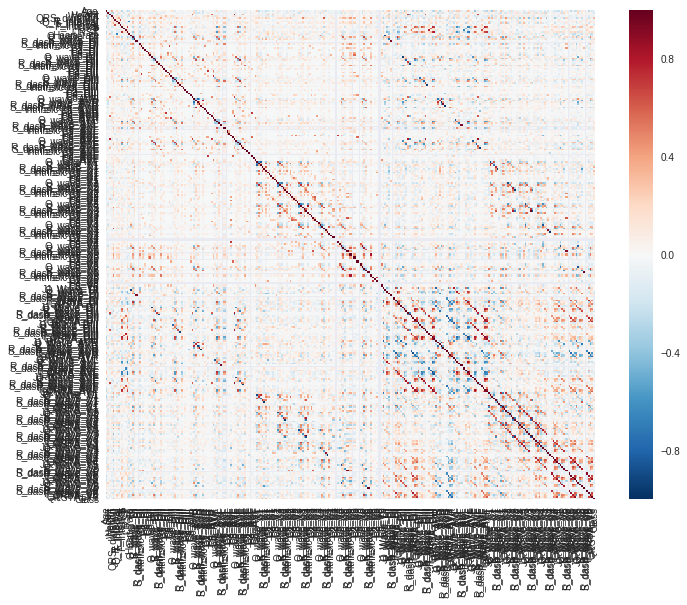

In [20]:
corrmat = df[df.columns.values].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

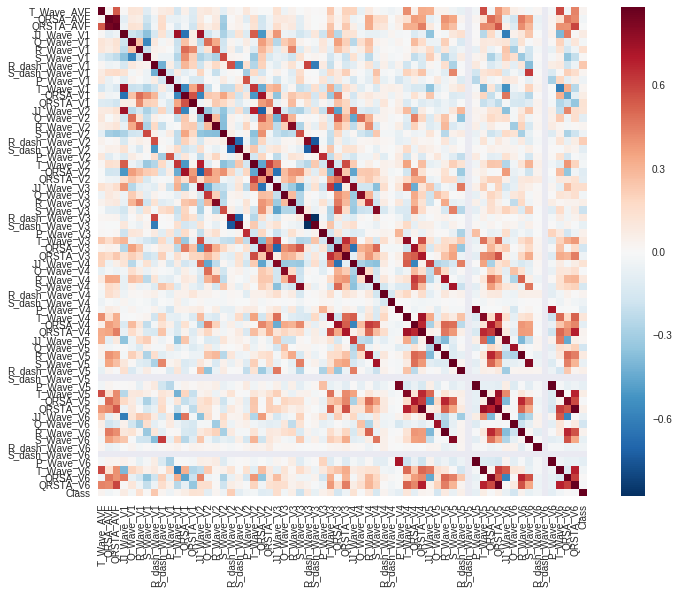

In [21]:
corrmat = df[df.columns.values[215:279]].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

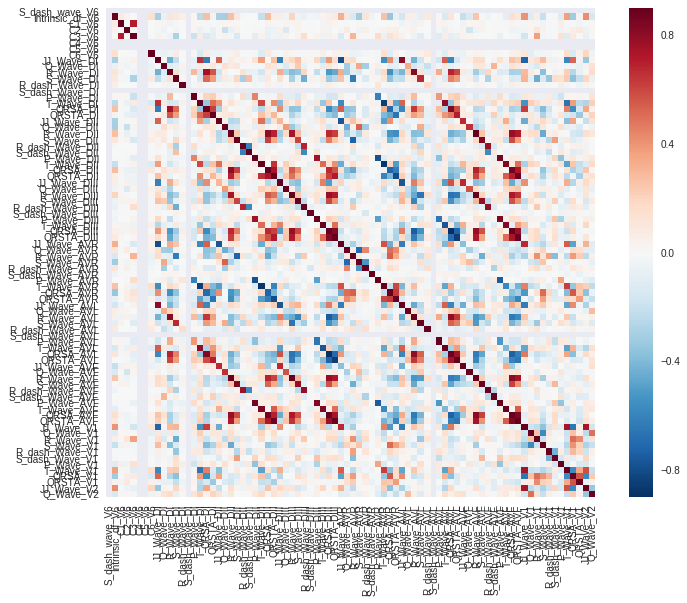

In [22]:
corrmat = df[df.columns.values[150:230]].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

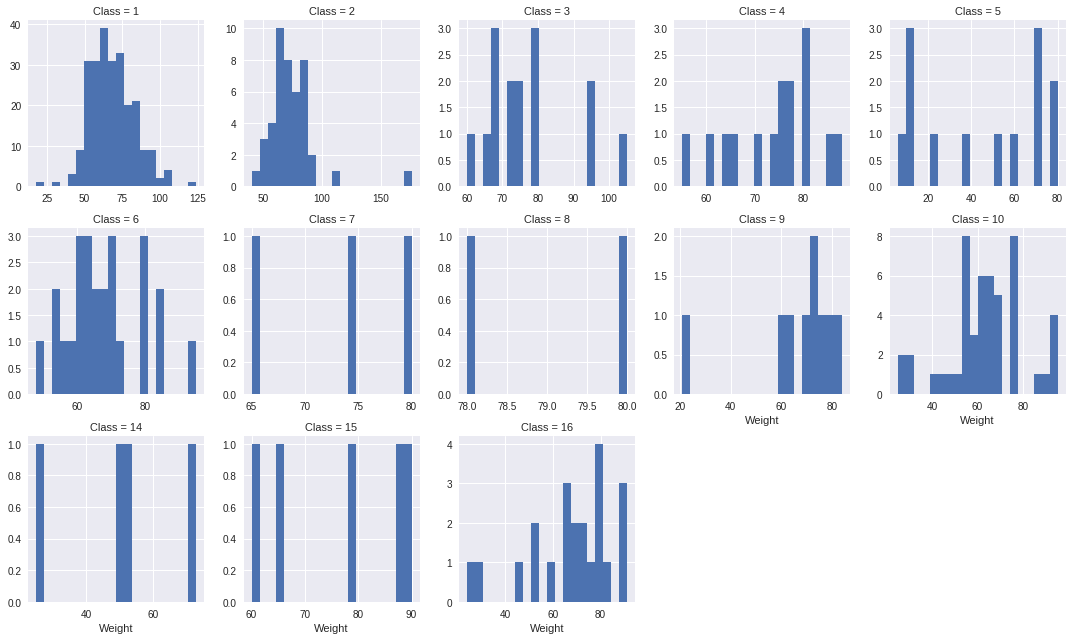

In [23]:
g = sns.FacetGrid(df, col='Class',col_wrap=5,sharex=False,sharey=False)
g.map(plt.hist, 'Weight', bins=20)

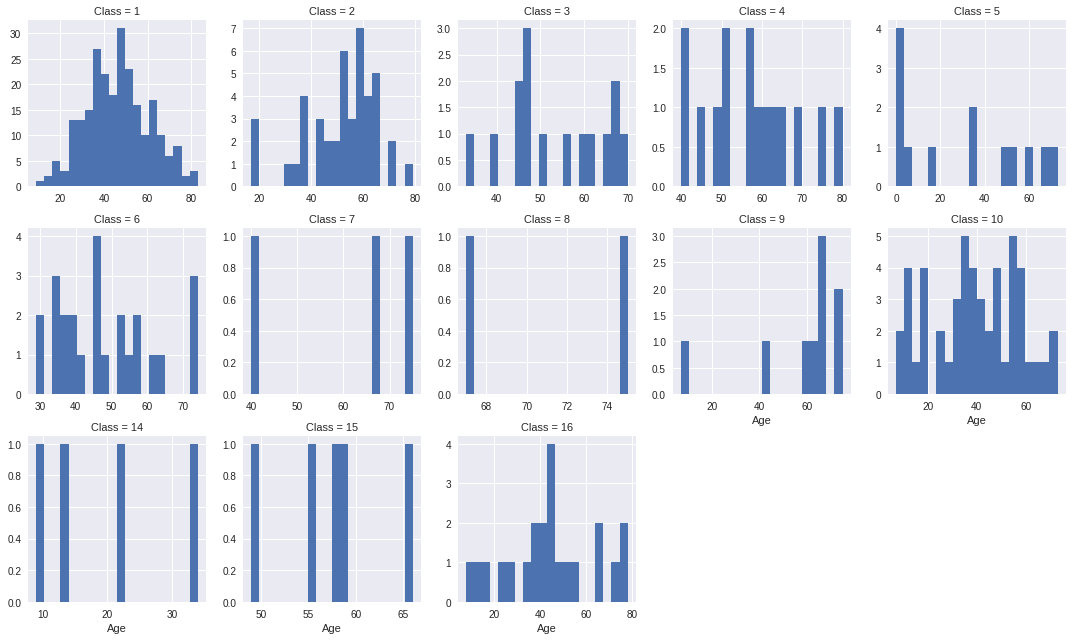

In [24]:
g = sns.FacetGrid(df, col='Class',col_wrap=5,sharex=False,sharey=False)
g.map(plt.hist, 'Age', bins=20)

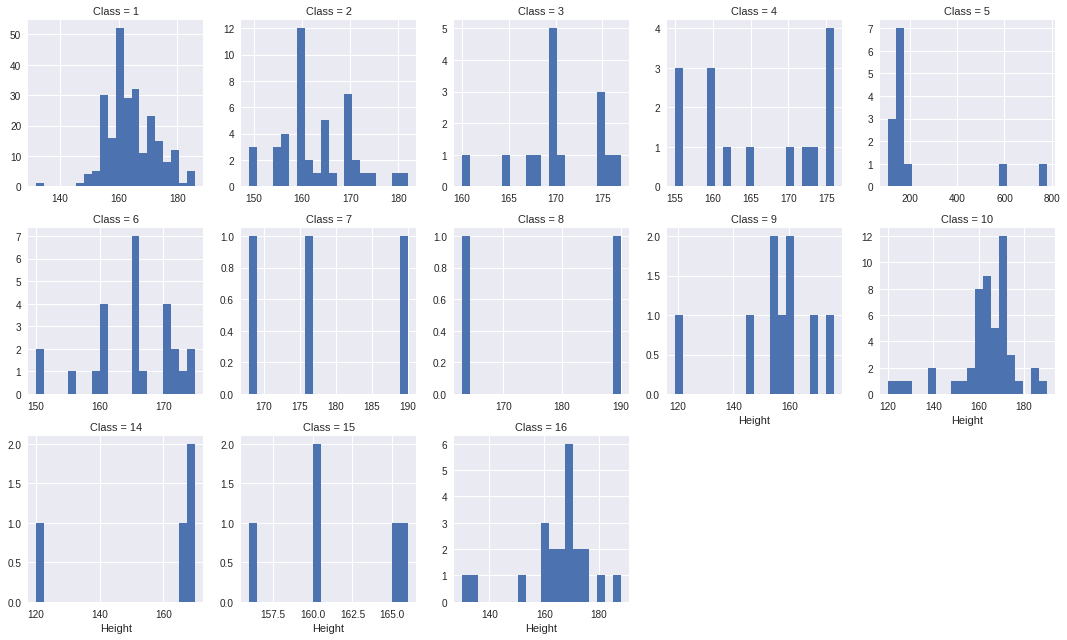

In [25]:
g = sns.FacetGrid(df, col='Class', col_wrap=5,sharex=False,sharey=False)
g.map(plt.hist, 'Height', bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


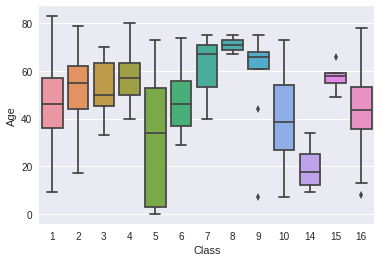

In [26]:
sns.boxplot(x="Class", y="Age", data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


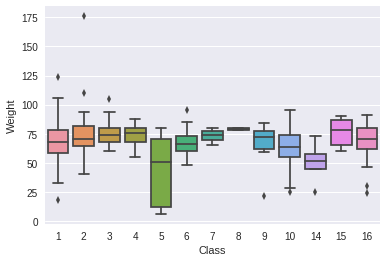

In [27]:
sns.boxplot(x="Class", y="Weight", data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(0, 250)

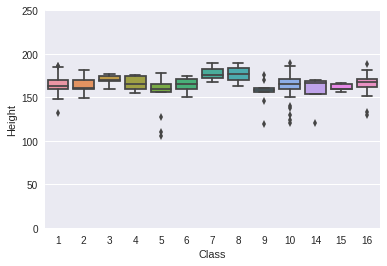

In [28]:
ht=sns.boxplot(x="Class", y="Height", data=df)
ht.set_ylim([0,250])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


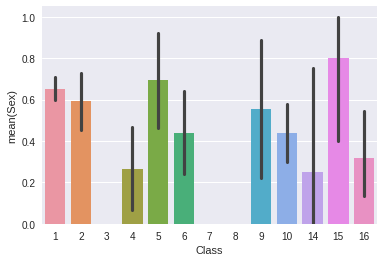

In [29]:
ax = sns.barplot(x="Class", y="Sex", data=df)

In [0]:
from sklearn.preprocessing import Imputer

In [31]:
df['P'].isna().sum()

22

In [0]:
df['P']=df['P'].fillna(df['P'].mean())

In [33]:
df['P'].isna().sum()

0

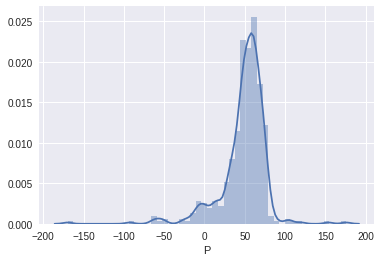

In [34]:
sns.distplot(df['P']);

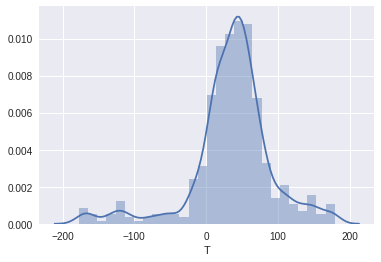

In [35]:
df['T']=df['T'].fillna(df['T'].mean())
sns.distplot(df['T']);

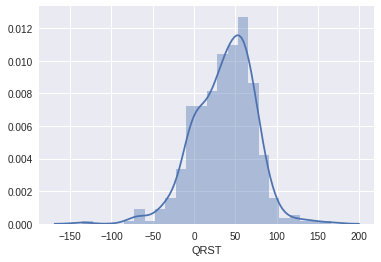

In [36]:
df['QRST']=df['QRST'].fillna(df['QRST'].mean())
sns.distplot(df['QRST']);

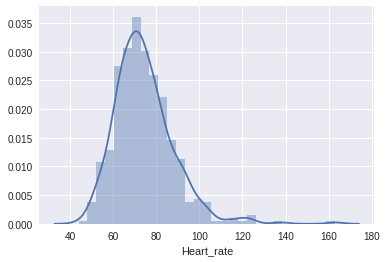

In [37]:
df['Heart_rate']=df['Heart_rate'].fillna(df['Heart_rate'].mean())
sns.distplot(df['Heart_rate']);

In [38]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Class,0,0.0
C3_V1,0,0.0
S_wave_V1,0,0.0
R_dash_wave_V1,0,0.0
S_dash_wave_V1,0,0.0
Intrinsic_df_V1,0,0.0
C1_V1,0,0.0
C2_V1,0,0.0
C4_V1,0,0.0
Intrinsic_df_V2,0,0.0


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)

In [0]:
X=df[df.columns.values]
Y=df['Class']

In [0]:
X=X.drop(['Class'],axis=1)

In [43]:
X.head()

,Age,Sex,Height,Weight,QRS_duration,P_R_interval,Q_T_interval,T_interval,P_interval,QRS,...,JJ_Wave_V6,Q_Wave_V6,R_Wave_V6,S_Wave_V6,R_dash_Wave_V6,S_dash_Wave_V6,P_Wave_V6,T_Wave_V6,QRSA_V6,QRSTA_V6
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [0]:
clf = clf.fit(X_train, y_train)

In [56]:
acc = clf.score(X_train, y_train)
print ("Training Set accuracy = ", acc*100)
acc = clf.score(X_test, y_test)
print ("Test Set accuracy = ", acc*100)
   


Training Set accuracy =  99.44598337950139
Test Set accuracy =  70.32967032967034


In [57]:
test_pred=clf.predict(X_test)
test_pred

array([ 1,  6,  1,  1,  1,  1,  1,  1,  3,  4,  1,  1,  1,  9,  1,  1,  1,
        1,  1,  1,  2,  1, 16,  1,  3,  3,  1,  1, 10, 10,  1,  2,  3,  1,
        1,  3,  1,  1,  1,  1,  1,  1,  6,  1,  2, 10,  1,  1,  1,  1,  1,
        1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,
       10,  1,  2,  1,  6,  1,  2,  2,  1,  1, 10,  1,  1,  1, 10,  1,  1,
        1,  1,  1,  5,  1,  2])

(91,)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_svc

48.35

In [71]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

53.85

In [70]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred_gaussian = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian

15.38

In [72]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_decn = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

57.14

In [74]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

69.23

In [76]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred_per = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
acc_perceptron

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


61.54

In [78]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred_lsvc = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
acc_linear_svc

57.14

In [80]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


64.84

In [84]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_log = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_log

60.44

In [85]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,69.23
6,Stochastic Gradient Decent,64.84
5,Perceptron,61.54
2,Logistic Regression,60.44
7,Linear SVC,57.14
8,Decision Tree,57.14
1,KNN,53.85
0,Support Vector Machines,48.35
4,Naive Bayes,15.38
